# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re
# extract information from coordination source
# which should return a dictionary of {city: coordination}
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.splitlines():
        if line.strip() == "": continue
#         city = re.search("[\u4e00-\u9fa5]{1,4}",line).group()
        city = re.findall("name:'(\w+)'",line)[0]
#         x_y = re.search("\[(\d+.\d+),\s(\d+.\d+)\]",line).group()
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

In [3]:
city_info = get_city_info(coordination_source)
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [4]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.
    
    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)
        
    Returns
    -------
    distance_in_km : float
    
    Examples
    --------
    >>> orgin = (48.1372, 11.5756) # Munich
    >>> destination = (52.5186, 13.4083) # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
        math.sin(dlon / 2) * math.sin(dlon / 2))
    c =  2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [5]:
def get_city_distance(city_info, city1, city2):
    return geo_distance(city_info[city1],city_info[city2])

get_city_distance(city_info, "杭州","上海")

153.5185697155768

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

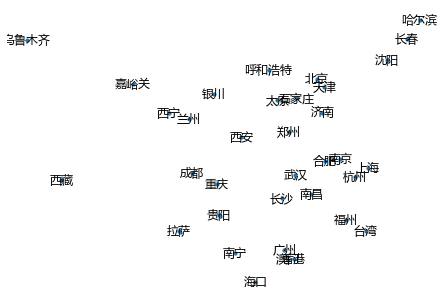

In [7]:
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [8]:
# assuming that two cities are not connected if the distance between them is less than 700km
# collect connected cites in a dictionary
threshold = 700
from collections import defaultdict
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2: continue
            if get_city_distance(city_info, c1, c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '海口', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '海口',
              '太原',
              '西安',
              '北京',
              '天津'

/Users/zhiweihuang/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


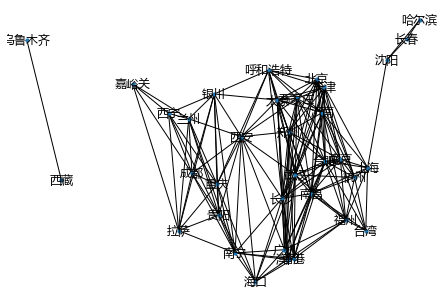

In [9]:
# draw graph of cities
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_info, with_labels=True,node_size=10)

In [10]:
def search_bfs(graph, start, destination):
    pathes = [[start]] # a list of lists, store searched path
    visited = set() # a set to store visited nodes
    
    while pathes:
#         print(pathes)
#         print("*****")
        path = pathes.pop(0) # take the first location in the list
        frontier = path[-1] # the next location to be visited
        
        if frontier in visited: continue
            
        successors = graph[frontier]
        
        for city in successors: # loop through all children locations
            if city in path: continue # check if it is loop
            new_path = path+[city] # add the children location
            pathes.append(new_path) # bfs add this path to list
#             pathes = [new_path] + pathes #dfs
            
            if city == destination: # check if destination reached
                return new_path
        visited.add(frontier)


In [11]:
search_bfs(cities_connection, "上海", "香港")

['上海', '合肥', '香港']

In [12]:
def search_bfs_optimal(graph, start, destination, search_strategy):
    pathes = [[start]]
#     visited = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
#         if frontier in visited: continue
#         if frontier == destination:
#             return path
        
        successors = graph[frontier]
        
        for city in successors:
            if city in path: continue
            new_path = path+[city]
            pathes.append(new_path) # bfs
        pathes = search_strategy(pathes)
#         visited.add(frontier)
        if pathes and (destination == pathes[0][-1]): # last location of the first path in sorted list
            return pathes[0]

In [19]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i, _ in enumerate(path[:-1]):
            distance += get_city_distance(city_info, path[i], path[i+1])
        return distance
    return sorted(pathes, key=get_distance_of_path)

In [20]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(city_info, path[i], path[i+1])
    return distance

In [21]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [22]:
get_distance_of_path(["北京","天津","上海"])

732.5085345714293

In [23]:
search_bfs_optimal(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '济南', '上海']

In [24]:
search_bfs_optimal(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

The required optimal conditions of BFS:
    1. All costs between two nodes are positive or zero
    2. Sort the list used to maintain the searching history in every iteration

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

One way that could make DFS optimal is to use greedy approach. The DFS will find all the routes and constantly update the weights on the shortest path. However, it has high complexity and therefore not practical.

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

    When trying to find an optimal route, BFS could be a better choice.
    When space is a concern, DFS is a better choice because it has lower space complexity.

##### 2.4 When can we use machine learning ?

We use machine learning for regression and classification problem (i.e. learn a function to fit the data and learn a hyperplane that can separate data of different categories.)

##### 2.5 What is the gradient of a function ?

    The gradient is the derivative or rate of change of a function.
    It is a vector that points to the direction of the greatest input of a function.
    It is zero at local maximum and local minimum.

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

    Finding a maximum value at a point can be done using the derivative of the function and the value of the point to calculate.
    Finding a maximum value of a function, if and only if there is one, when the gradient is zero, there should be local minimum or maximum value. And possbily, finding the biggest values of all local maximums.

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [25]:
import re
import requests
from bs4 import BeautifulSoup

In [26]:
urls = ["http://map.amap.com/service/subway?_1586074596373&srhdata=1100_drw_beijing.json"]
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'
}

In [27]:
session = requests.Session()
session.headers = headers

In [28]:
def get_html(url):
    try:
        html = session.get(url)
        html.encoding = 'utf-8'
        return html.text
    except Exception as e:
        print(e)

In [29]:
for url in urls:
    html_text = get_html(url)
    print(html_text)
    with open ("stations3.txt", encoding="utf-8", mode="w") as f:
        f.write(html_text)

{"s":"北京市地铁","i":"1100","l":[{"st":[{"rs":"270 684|270 684","udpx":"270 687;270 681","su":"1","udsu":"1;1","n":"金安桥","sid":"110100023339035","p":"270 684","r":"900000069871|110100023339","udsi":"900000069872015;900000069871002","t":"1","si":"110100023339035","sl":"116.163167,39.923620","udli":"900000069872;900000069871","poiid":"BV10813545","lg":"0","sp":"jin an qiao"},{"rs":"226 684","udpx":"226 681;226 687","su":"1","udsu":"1;1","n":"四道桥","sid":"900000069871003","p":"226 684","r":"900000069871","udsi":"900000069871003;900000069872014","t":"0","si":"900000069871003","sl":"116.134010,39.916030","udli":"900000069871;900000069872","poiid":"BV10813547","lg":"0","sp":"si dao qiao"},{"rs":"181 684","udpx":"180 681;180 687","su":"1","udsu":"1;1","n":"桥户营","sid":"900000069871004","p":"181 684","r":"900000069871","udsi":"900000069871004;900000069872013","t":"0","si":"900000069871004","sl":"116.125809,39.912383","udli":"900000069871;900000069872","poiid":"BV10813541","lg":"0","sp":"qiao hu ying

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [30]:
def get_stations(web_page):
    lines = {}
    stations = {}
    # finding name of lines
    pattern = re.compile('"st".*?"kn"')
    lines_list = pattern.findall(web_page)
    for line in lines_list:
        line_pattern = re.compile('"(\w+)"')
        line_name = line_pattern.findall(line)[-4]
        stations_name_pattern = re.compile('"n":"(\w+)"')
        stations_name = stations_name_pattern.findall(line)
        stations_location_pattern = re.compile('"sl":"(\d+.\d+),(\d+.\d+)"')
        stations_location = stations_location_pattern.findall(line) 
#         lines[line_name] = [(stations_name[i], (tuple(map(float,stations_location[i])))) for i in range(len(stations_name))]
        lines[line_name] = stations_name
        for i in range(len(stations_name)):
            stations[stations_name[i]] = tuple(map(float,stations_location[i]))
    return lines, stations

In [31]:
lines = {}
stations = {}
with open("stations3.txt", encoding="utf-8") as f:
    html_text = f.read()
    lines, stations = get_stations(html_text)
print(lines)
print(stations)

{'S1线': ['金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂'], '1号线': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'], '2号线': ['积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄', '西直门'], '4号线大兴线': ['天宫院', '生物医药基地', '义和庄', '黄村火车站', '黄村西大街', '清源路', '枣园', '高米店南', '高米店北', '西红门', '新宫', '公益西桥', '角门西', '马家堡', '北京南站', '陶然亭', '菜市口', '宣武门', '西单', '灵境胡同', '西四', '平安里', '新街口', '西直门', '动物园', '国家图书馆', '魏公村', '人民大学', '海淀黄庄', '中关村', '北京大学东门', '圆明园', '西苑', '北宫门', '安河桥北'], '5号线': ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北'], '6号线': ['潞城', '东夏园', '郝家府', '北运河东', '北运河西', '通州北关', '物资学院路', '草房', '常营', '黄渠', '褡裢坡', '青年路', '十里堡', '金台路', '呼家楼', '东大桥', '朝阳门', '东四', '南锣鼓巷', '北海北', '平安里', '车公庄', '车公庄西', '白石桥南', '

In [32]:
from collections import defaultdict
def build_connection(lines):
    stations_connection = defaultdict(list)
    lines_name = list(lines.keys())
    for line_name in lines_name:
        current_line = lines[line_name]
        n = len(current_line)
        for i in range(n-1):
            stations_connection[current_line[i]].append(current_line[i+1])
            stations_connection[current_line[n-1-i]].append(current_line[n-2-i])
    return stations_connection

In [33]:
stations_connection = build_connection(lines)
stations_connection

defaultdict(list,
            {'金安桥': ['四道桥', '杨庄'],
             '石厂': ['小园'],
             '四道桥': ['桥户营', '金安桥'],
             '小园': ['栗园庄', '石厂'],
             '桥户营': ['上岸', '四道桥'],
             '栗园庄': ['上岸', '小园'],
             '上岸': ['栗园庄', '桥户营'],
             '苹果园': ['古城'],
             '四惠东': ['四惠', '高碑店', '四惠'],
             '古城': ['八角游乐园', '苹果园'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '八角游乐园': ['八宝山', '古城'],
             '大望路': ['国贸', '四惠', '金台路', '九龙山'],
             '八宝山': ['玉泉路', '八角游乐园'],
             '国贸': ['永安里', '大望路', '双井', '金台夕照'],
             '玉泉路': ['五棵松', '八宝山'],
             '永安里': ['建国门', '国贸'],
             '五棵松': ['万寿路', '玉泉路'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '万寿路': ['公主坟', '五棵松'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '公主坟': ['军事博物馆', '万寿路', '莲花桥', '西钓鱼台'],
             '王府井': ['天安门东', '东单'],
             '军事博物馆': ['木樨地', '公主坟', '北京西站', '白堆子'],
             '天安门东': ['天安门西', '王府井'],
     

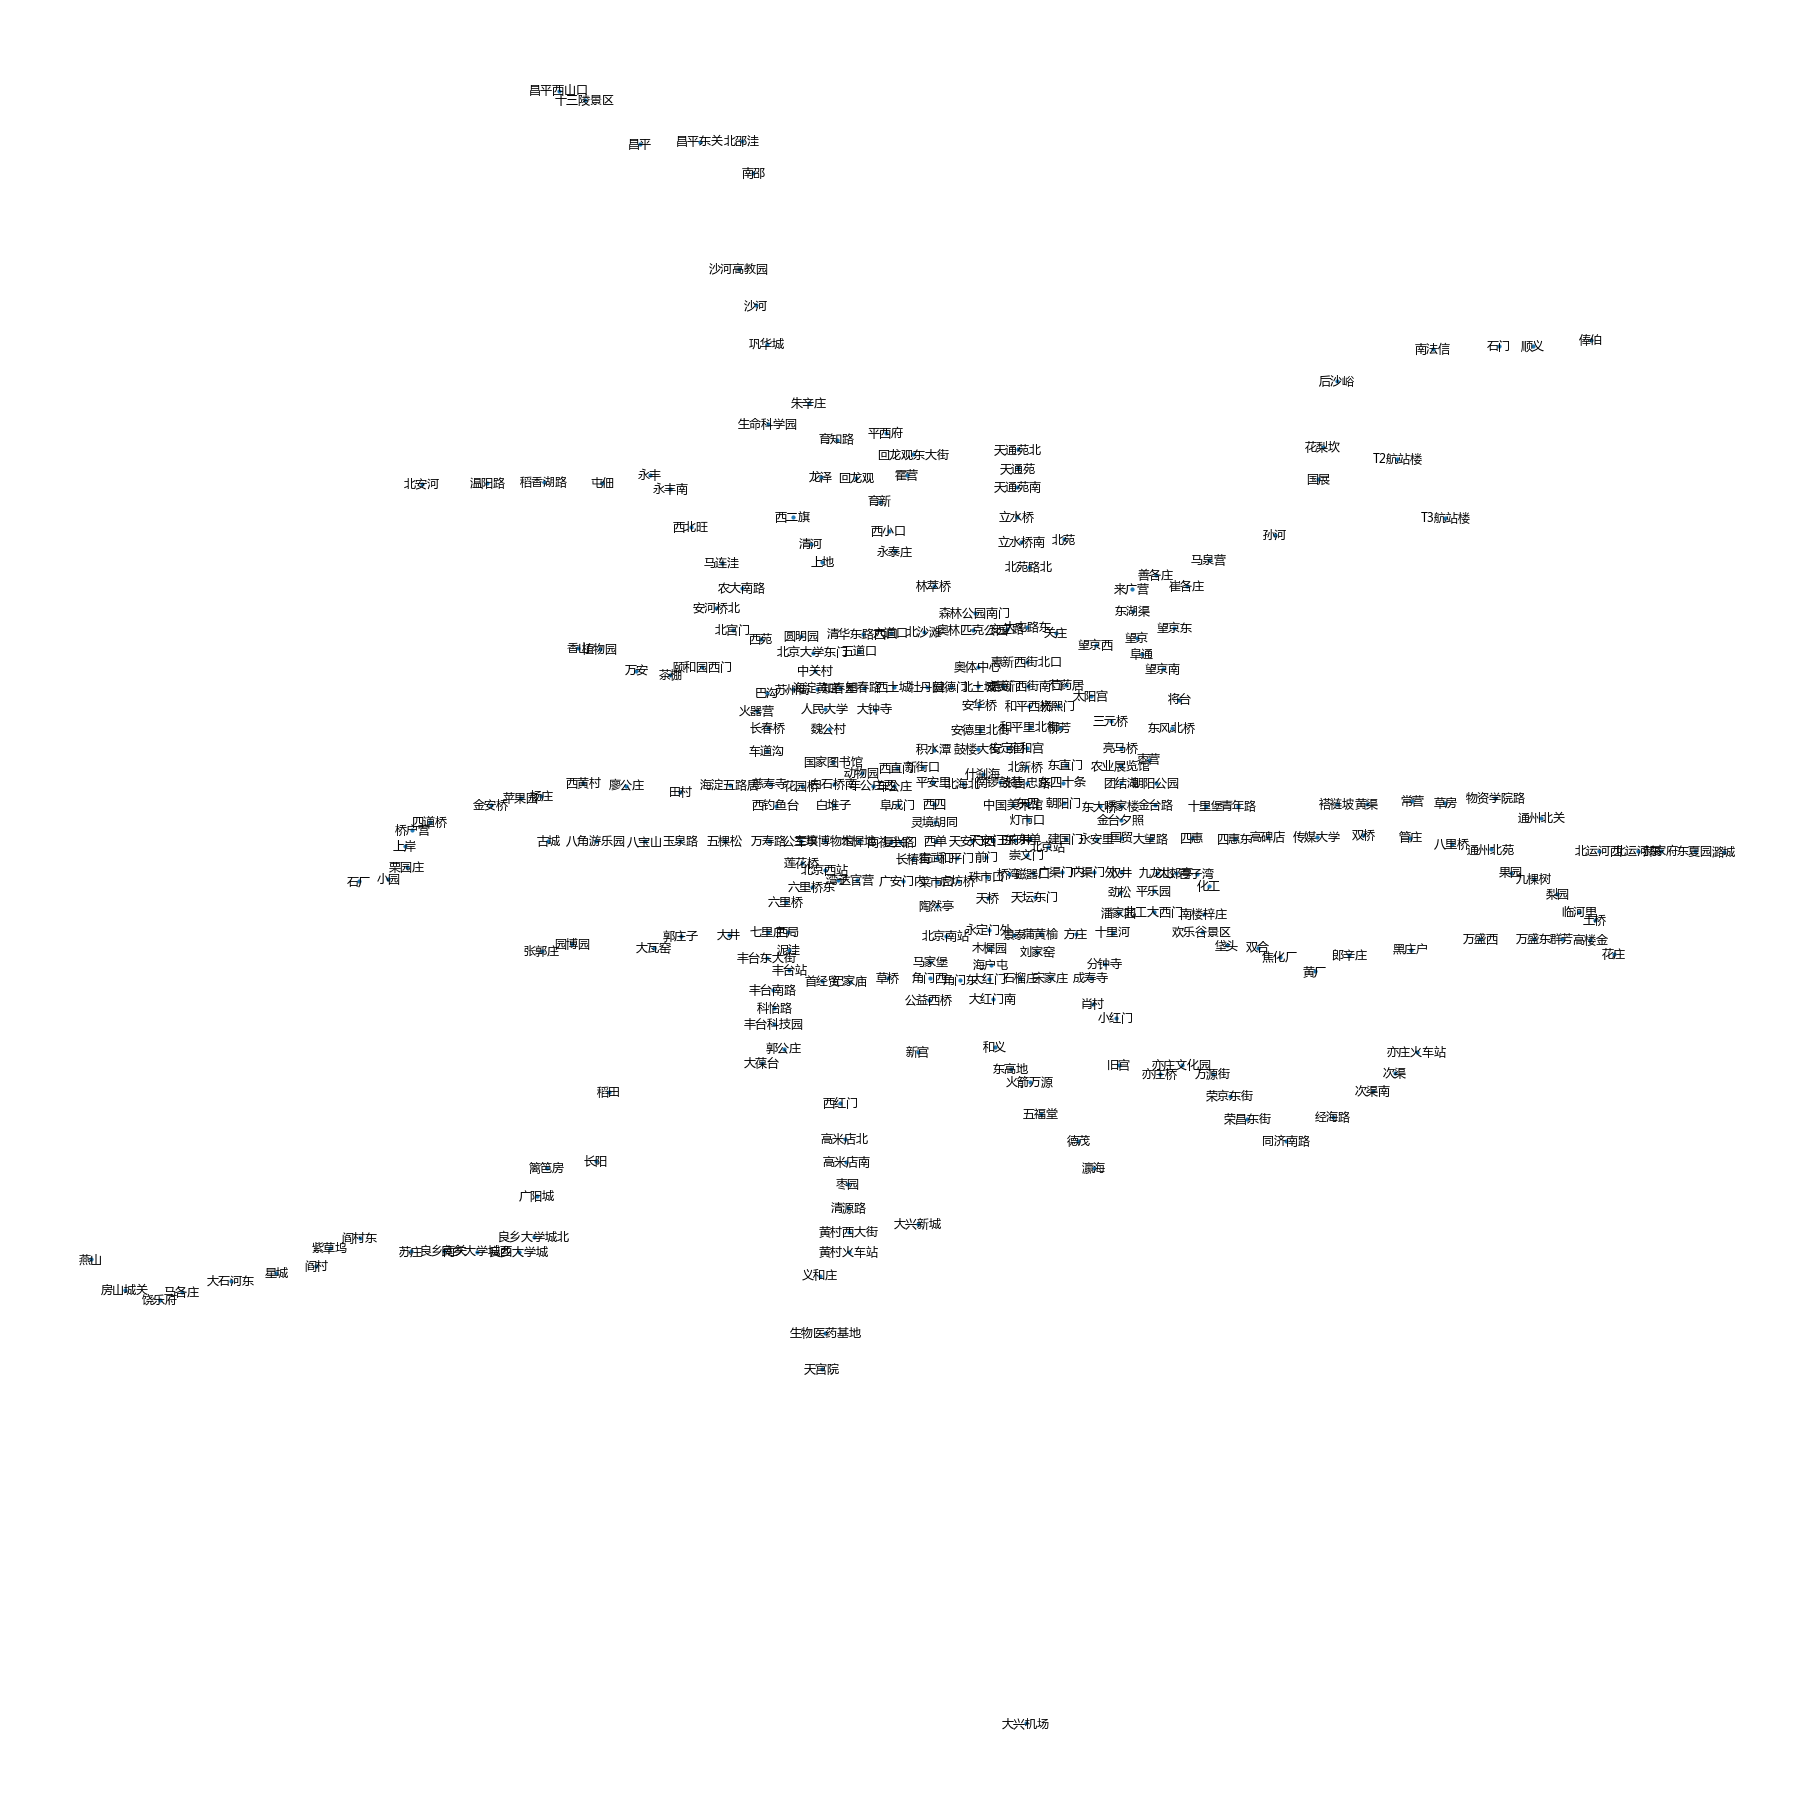

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
subway = nx.Graph()
subway.add_nodes_from(list(stations.keys()))
nx.draw(subway, stations, with_labels=True, node_size=10)

/Users/zhiweihuang/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


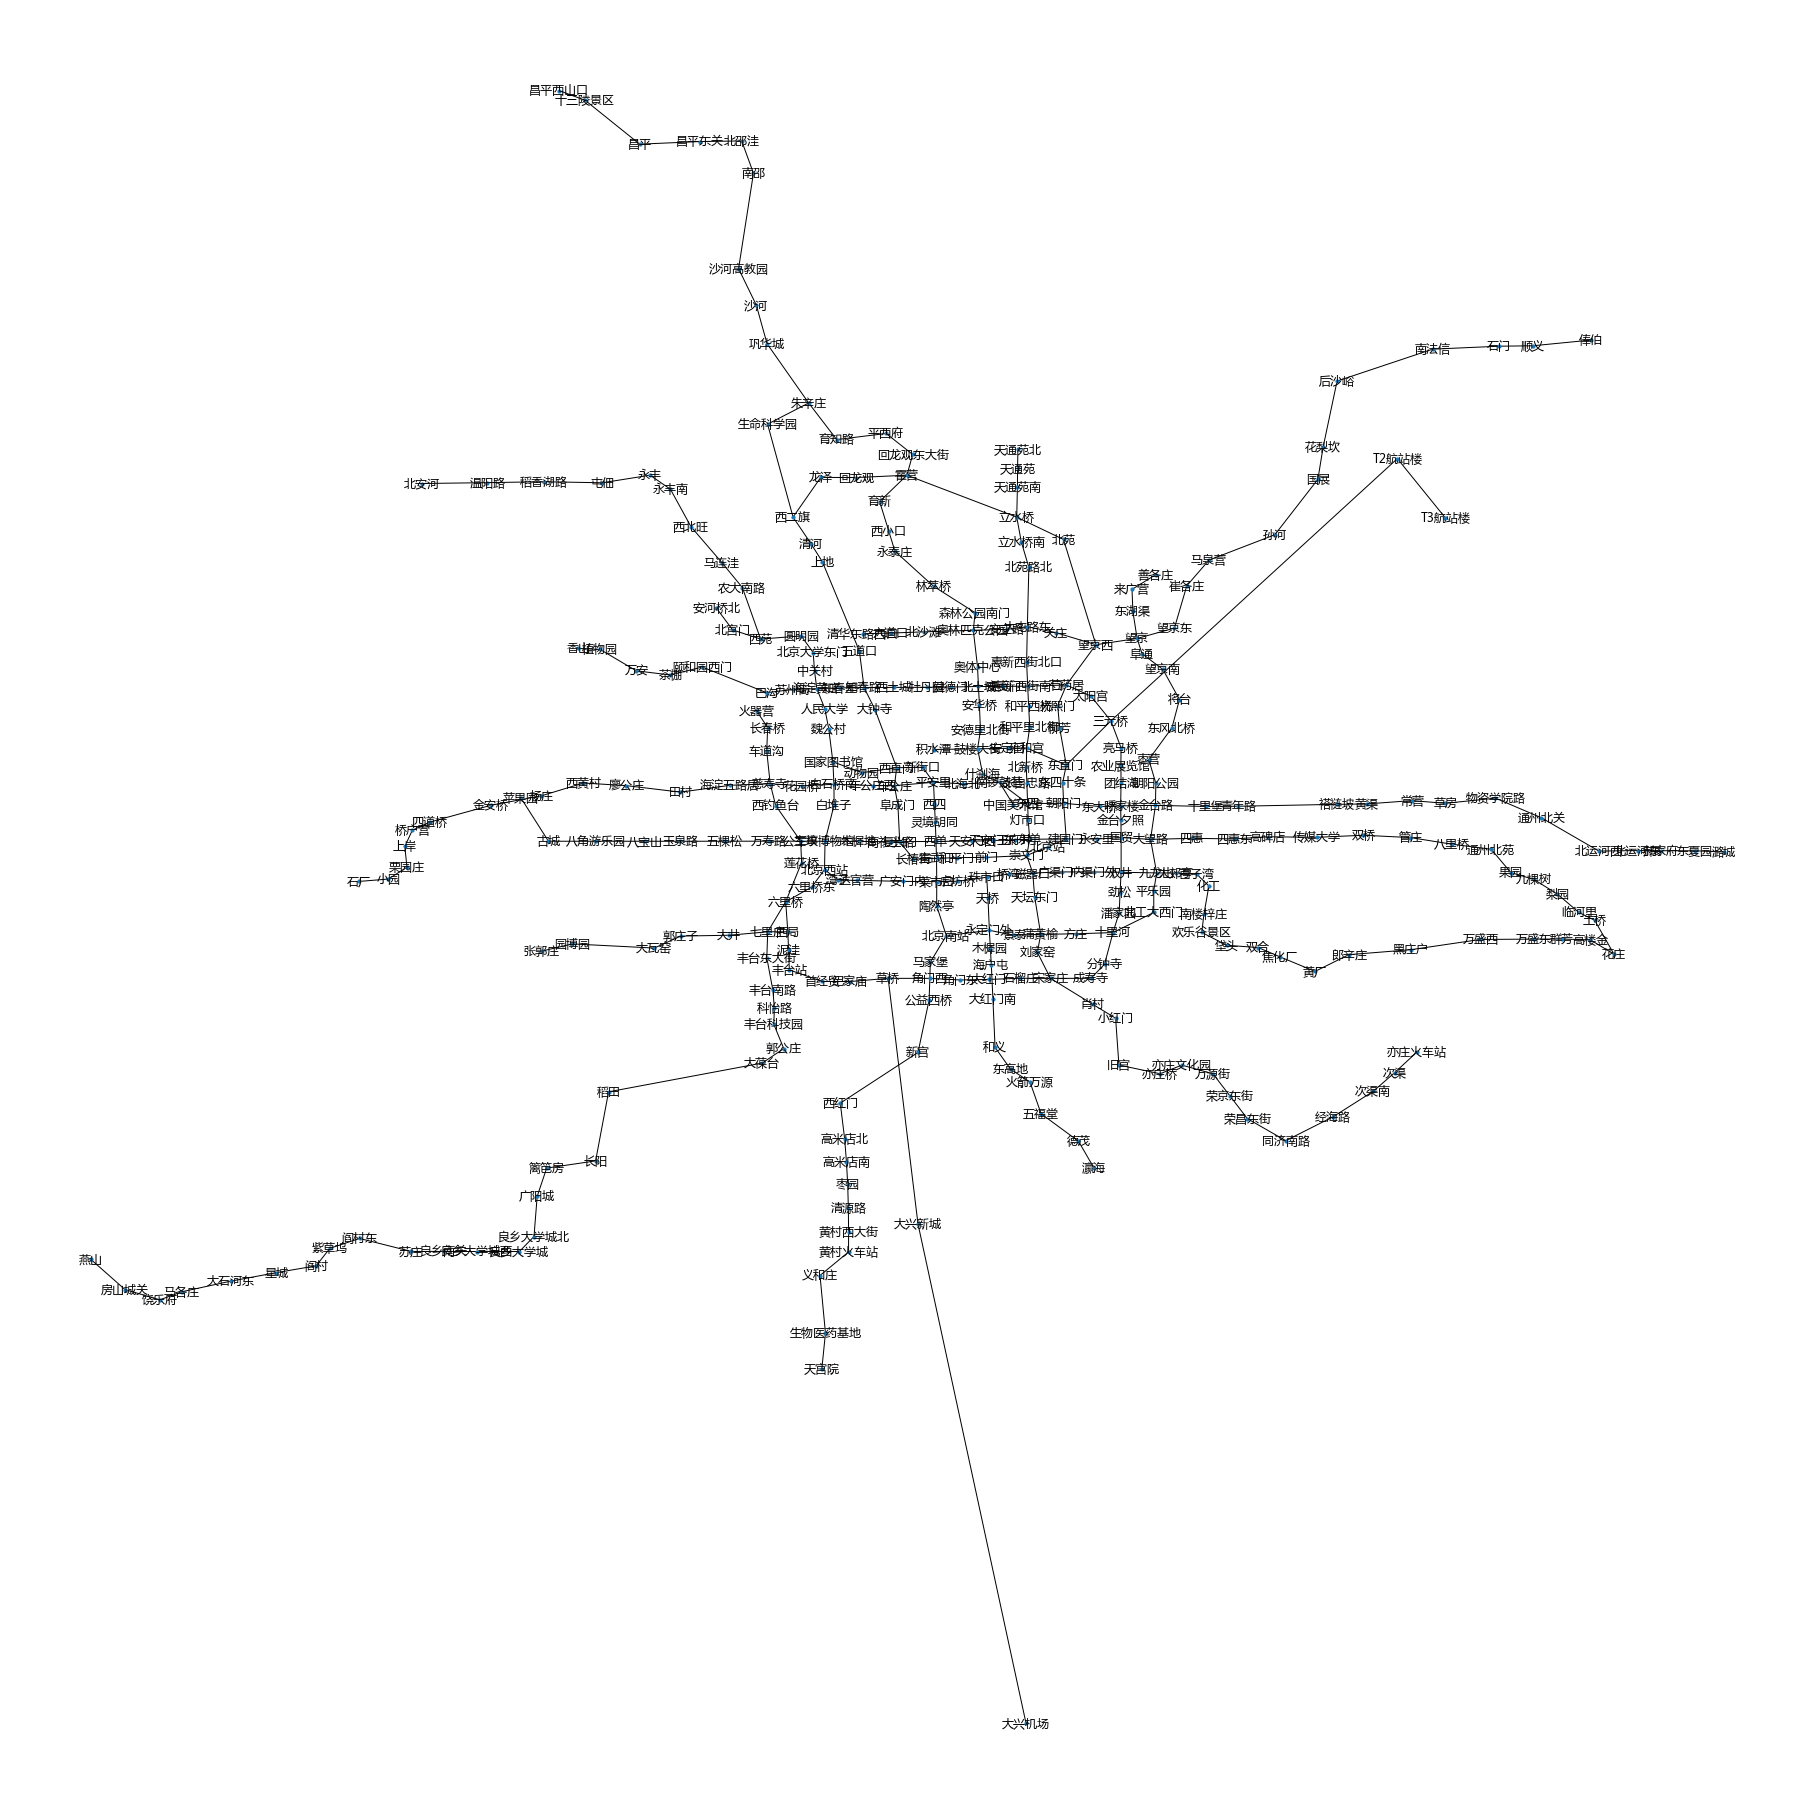

In [35]:
plt.figure(figsize=(25,25))
subway_connection = nx.Graph(stations_connection)
nx.draw(subway_connection, stations, with_labels=True, node_size=10)

#### 3. Build the search agent

Build the search agent based on the graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [37]:
def search(subway_connection, start, destination):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in visited: continue
        successors = subway_connection[frontier]
        for station in successors:
            if station in path: continue
            new_path = path+[station]
            pathes.append(new_path)
            if station == destination:
                return new_path
        visited.add(frontier)

In [56]:
search(stations_connection, "西直门","平安里")

['西直门', '车公庄', '平安里']

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [52]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(stations, path[i], path[i+1])
        return distance
    return sorted(pathes, key=get_distance_of_path)                

In [53]:
# assuming distance between any two stations are of equal length and travelling duration
def search_shortest(subway_connection, start, destination, search_strategy):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in visited: continue
        if frontier == destination:
            return path
        successors = subway_connection[frontier]
        for station in successors:
            if station in path: continue
            new_path = path+[station]
            pathes.append(new_path)
        pathes = search_strategy(pathes)
        visited.add(frontier)

In [55]:
search_shortest(subway_connection, "西直门","平安里", search_strategy=sort_by_distance)

['西直门', '新街口', '平安里']

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 